In [136]:
from Images import Images
from SIFT import SIFT
from Matcher import Matcher

import cv2
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


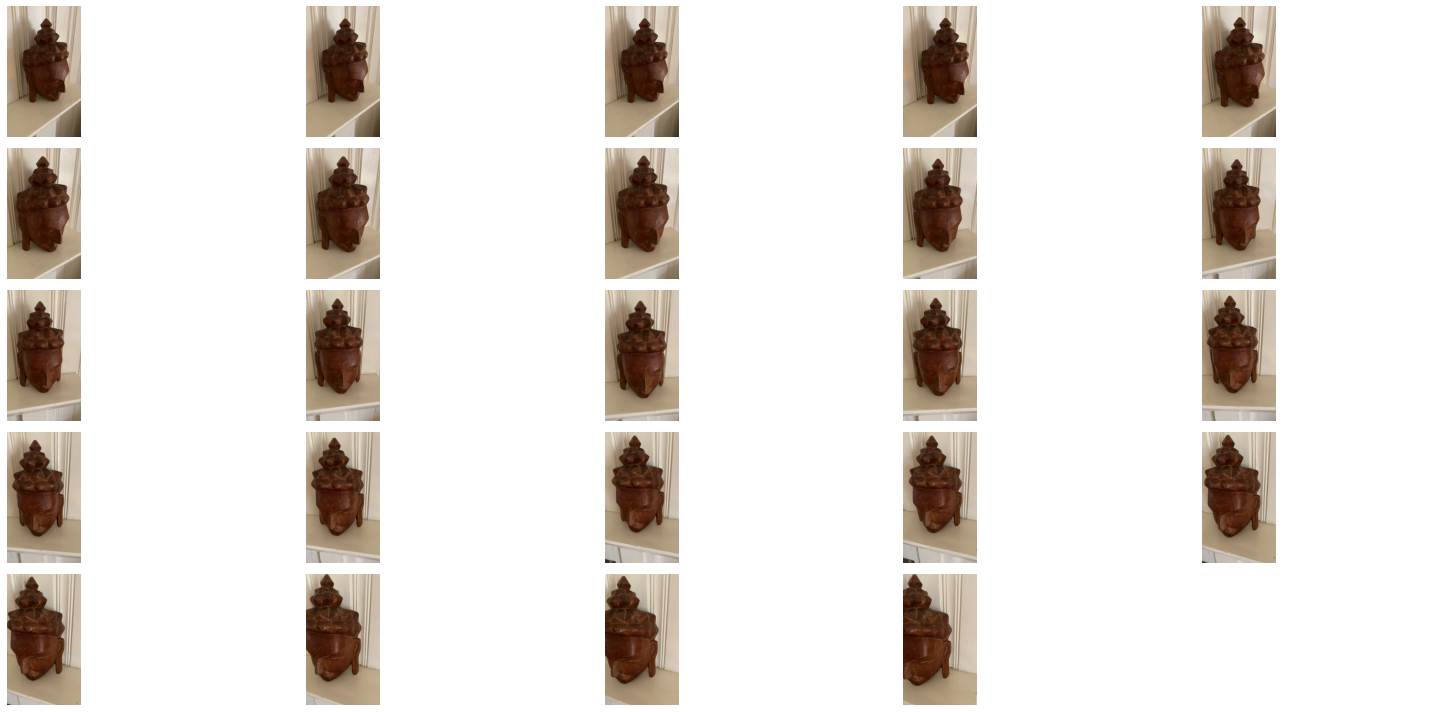

In [12]:
imgs = Images()
imgs.read_imgs_from_folder("buddha_images/", resize_factor=0.4, show_imgs=True)

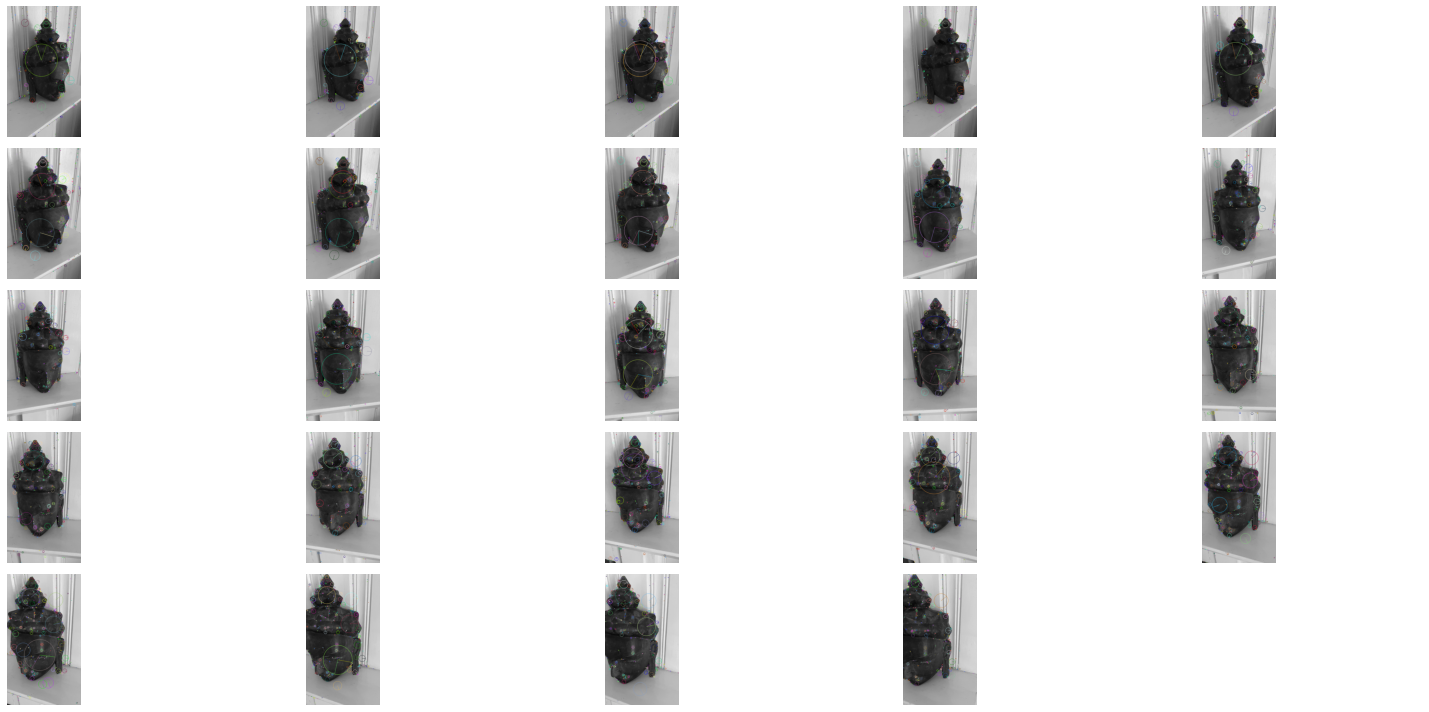

In [131]:
sift = SIFT()
sift.create_detector()
keypoints, descriptors = sift.detect_keypoints(imgs.gray, imgs.num_imgs, plot=True)

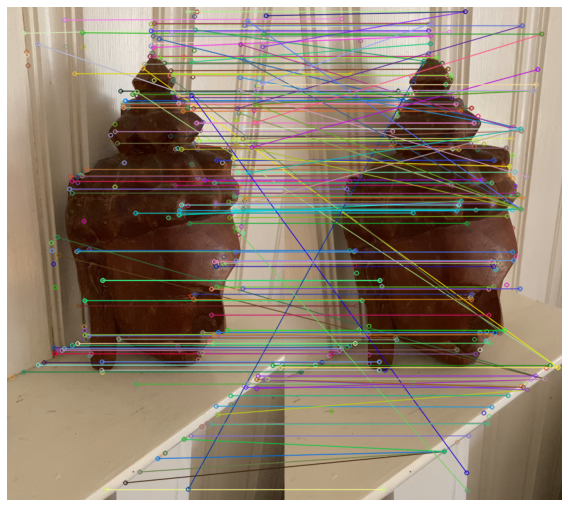

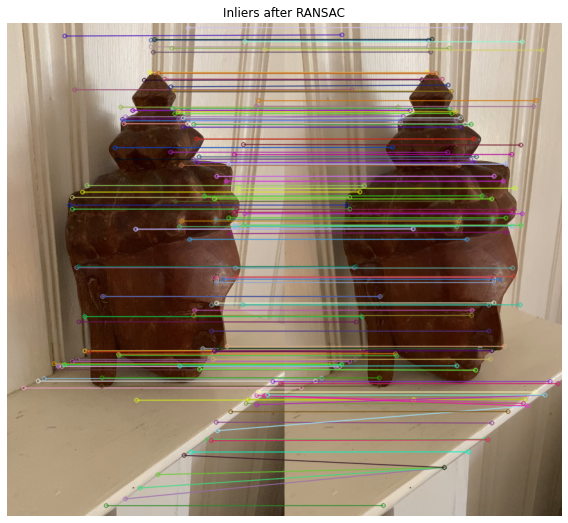

In [132]:
matcher = Matcher(imgs=imgs.rgb, keypoints=keypoints, descriptors=descriptors)
src_points, dst_points, good_matches = matcher.match_features(0,1,True)

F, inlier_mask = cv2.findFundamentalMat(src_points, dst_points, method=cv2.RANSAC, ransacReprojThreshold=2)
src_inliers = src_points[inlier_mask.ravel() == 1]
dst_inliers = dst_points[inlier_mask.ravel() == 1]

matcher.draw_inliers(inlier_mask, good_matches, 0, 1)

In [92]:
inliers_idx = np.where(inlier_mask == 1)
src_homo = np.concatenate([src_points, np.ones((src_points.shape[0], 1, 1))], axis=2)[inliers_idx[0]]
dst_homo = np.concatenate([dst_points, np.ones((dst_points.shape[0], 1, 1))], axis=2)[inliers_idx[0]]

In [133]:
lines = cv2.computeCorrespondEpilines(src_homo, 1, F).reshape(-1, 3)

In [150]:
dst_homo[0][0][0]

25.436826705932617

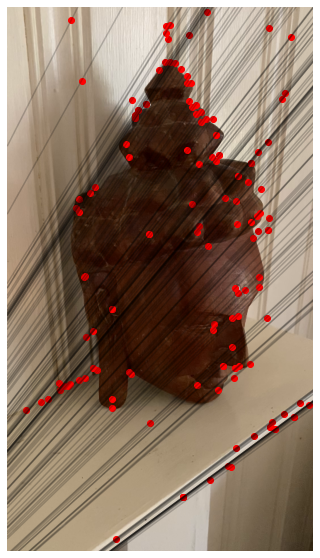

In [172]:
idx = 5

plt.figure(figsize=(10, 10))
plt.axis("off")

for idx, line in enumerate(lines):
    a, b, c = line
    x_0, y_0 = map(int, [0, -c/b])
    x_1, y_1 = map(int, [-c/a, 0])
    plt.plot([x_0, x_1], [y_0, y_1], c = 'k', alpha = 0.2)
    plt.scatter(dst_homo[idx][0][0], dst_homo[idx][0][1], c = 'r')
    
plt.imshow(imgs.rgb[1])
plt.show()